In [1]:
# pip install autokeras

In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '2f5a6780-2fed-47cc-a89a-efd6b03243cc'
resource_group = 'ml_for_ccfd'
workspace_name = 'ml_for_ccfd_ws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Capstone_CCFD')
df=dataset.to_pandas_dataframe()

In [3]:
import time
start_time = time.time()

import numpy as np
import pandas as pd
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


problem_type = 'binary'
target_column = 'Class'

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Initialize AutoKeras classifier
clf = ak.StructuredDataClassifier(max_trials=10, overwrite=True, loss='binary_crossentropy')

clf.fit(X_train_np, y_train_np, epochs=10)

Trial 10 Complete [00h 01m 46s]
val_accuracy: 0.9994071125984192

Best val_accuracy So Far: 0.9995608329772949
Total elapsed time: 00h 18m 41s
Epoch 1/10
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0080 - accuracy: 0.9988
Epoch 2/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 6/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 7/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 8/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 9/10
7121/7121 [===========

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


In [4]:
end_time = time.time()

num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

Workflow_Runtime = end_time - start_time
print(f"\nAutoML Workflow Runtime: {Workflow_Runtime:.2f} seconds")

Number of samples in the test set: 56962 


AutoML Workflow Runtime: 1261.70 seconds


In [5]:
start_time = time.time()
y_predicted = clf.predict(X_test_np)
end_time = time.time()

accuracy = accuracy_score(y_test_np, y_predicted)
precision = precision_score(y_test_np, y_predicted)
recall = recall_score(y_test_np, y_predicted)
f1 = f1_score(y_test_np, y_predicted)

confusion_matrix_result = confusion_matrix(y_test_np, y_predicted)

num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds \n")

print("Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix_result)

1781/1781 [==============================] - 2s 953us/step
Number of samples in the test set: 56962 


Prediction Time: 4.95 seconds
Evaluation Metrics on Test Data:
Accuracy: 0.9994
Precision: 0.8889
Recall: 0.7347
F1-Score: 0.8045

Confusion Matrix:
[[56855     9]
 [   26    72]]

Execution time: 5.12 seconds


Number of samples in the test set: 56962 


Prediction Time: 5.12 seconds


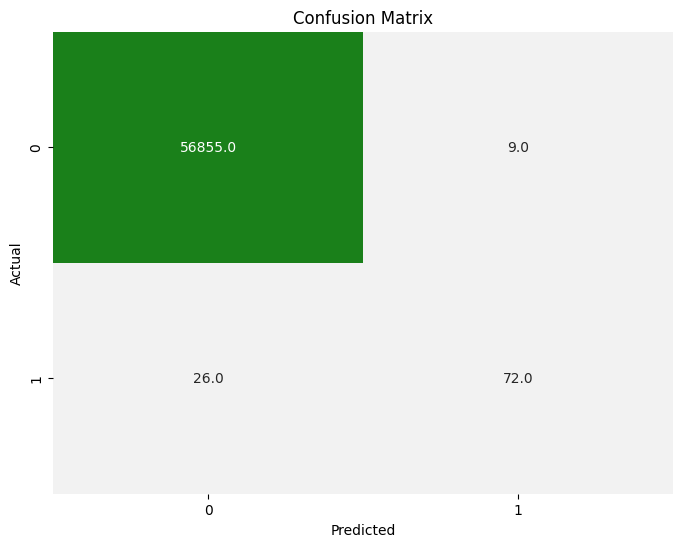

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

TN = confusion_matrix_result[0][0]
TP = confusion_matrix_result[1][1]
FP = confusion_matrix_result[0][1]
FN=confusion_matrix_result[1][0]

confusion_matrix_data = np.array([[TN, FP], [FN, TP]])
tn, fp, fn, tp = confusion_matrix_data.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots(figsize=(8, 6))

colors = [(0.95, 0.95, 0.95), (0.1, 0.5, 0.1)]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.heatmap(confusion_matrix_data, annot=True, fmt='.1f', cmap=cmap, ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()